In [1]:
%matplotlib notebook

In [2]:
# Close a hole in this notebook's Dockerfile

import sys
!{sys.executable} -m pip install torchmetrics

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time

import warnings

In [4]:
from pacsmodeling import (
    PACSDatasetMultipleDomain, PACSDatasetSingleDomain
)

In [5]:
def plot_n_images_from_domain(domain, n, display_lag, data_type=int, start_index=0):
    fig, ax = plt.subplots()

    plt.ion()
    plt.show()
    for i in range(start_index, start_index + n): 
        x,y = domain[i]
        im_to_show = np.transpose(x.astype(data_type), (1,2,0))
        ax.imshow(im_to_show)  # plot the figure
        plt.gcf().canvas.draw()
        time.sleep(display_lag)

In [6]:
mix_dom = PACSDatasetMultipleDomain(
    "art_painting", "train", normalize=False
)

<IPython.core.display.Javascript object>


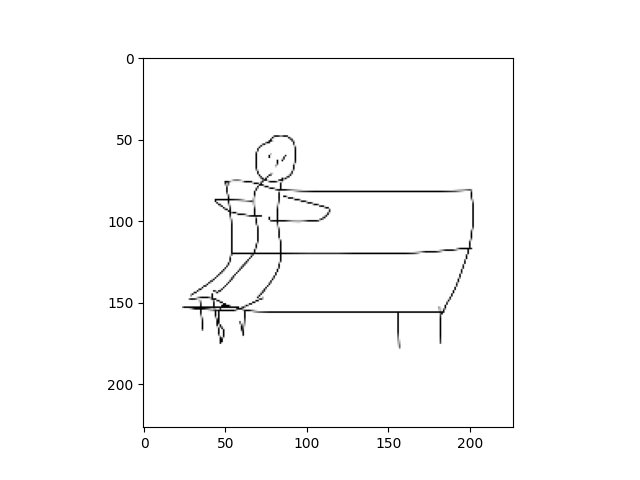

In [7]:
plot_n_images_from_domain(mix_dom, 1, 0.25, int, 7000)

In [8]:
mix_dom.split_indices

[2107, 3606, 7137]

In [9]:
mix_dom.domain_names

['cartoon', 'photo', 'sketch']

In [10]:
mix_dom.split_name

'train'